In [ ]:
# Importando bibliotecas
import numpy as pd
import pandas as pd

In [18]:
# Carregar dados 
from google.colab import files
carregar = files.upload()


Saving ratings.csv to ratings (3).csv


In [19]:
# Armazenar dados
pontos_filmes = pd.read_csv('ratings.csv')

In [20]:
# Mostrar 5 linhas dos dados
pontos_filmes.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Conhecendo o conjunto de dados
# O UserId tem o Id do usuário.
# O moviedId contêm o Id do Filme.
# Rating é a classficação que o filme recebeu.
# E finalmente o timestamp que é o tempo que o usuário deixou a classificação do filme.
# Então podemos entender que esse conjunto de dados é referente a pontução dos filmes.
# Porém, ele não tem o nome dos filmes, então teremos que carregar outro conjunto de dados.

In [21]:
# Carregar dados que contenha o nome do filme
carregar2 = files.upload()

Saving movies.csv to movies (1).csv


In [22]:
nome_dos_filmes = pd.read_csv('movies.csv')

In [23]:
# Visulizar os dados
nome_dos_filmes.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# Nesse conjunto de dados contêm o nome do filme, seu Id e o seu gênero.
# Nós precisamos de um conjunto de dados que tenha Id do usuário, o nome do filme e sua classificação.
# Como essas informações estão em conjuntos de dados diferentes, precisaremos juntar os dados.
# E assim transformar em um único conjunto de dados e para isso usaremos a função merge() da biblioteca do pandas.

In [24]:
# Juntar os dados
dados_filmes = pd.merge(pontos_filmes, nome_dos_filmes, on='movieId')

In [25]:
# Visualizar dados
dados_filmes.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [26]:
# Você pode ver que os dois dados foram unidos e agora poderemos fazer nossa análise.
# Vamos começar pela média de classificação de cada filme.

In [27]:
# Média de classificação dos filmes
dados_filmes.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [28]:
# Vamos ordenar os dados de forma decrescente
dados_filmes.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [29]:
# Agora vamos ver a quantidade de pessoas que classficaram os filmes.
dados_filmes.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [30]:
# Bom, com a nossa análise conseguimos obter a média de classficações recebidas por cada filme e
# a quantidade de pessoas que classficaram os filmes, vamos criar um conjunto de dados e inserir essas
# duas informações.

In [62]:
# Vamos criar um dataframe com a classificação média recebida por cada filme.
classificacao_media_quantidade = pd.DataFrame(dados_filmes.groupby('title')['rating'].mean())

In [63]:
# Agora vamos adicionar ao mesmo dataframe a quantidade de pessoas que classficaram os filmes.
classificacao_media_quantidade['rating_counts'] = pd.DataFrame(dados_filmes.groupby('title')['rating'].count())

In [64]:
# Visualizando o conjunto de dados que contruímos.
classificacao_media_quantidade.head(5)

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [35]:
# Você pode ver que nesse conjunto de dados tem a média de classifacação dos filmes e quantidade de pessoas que classificaram os filmes.

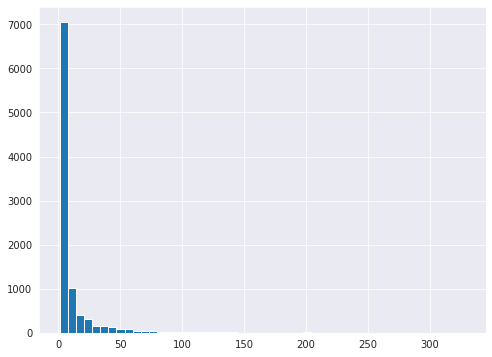

In [65]:
# Vamos plotar um gráfico para ver a frequência  de classificação recebida por cada filme
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
classificacao_media_quantidade['rating_counts'].hist(bins=50)

In [39]:
# O fráfico mostra que a maioria dos filmes receberam menos de 50 classificação e poucos recebem mais de 50 classficação.

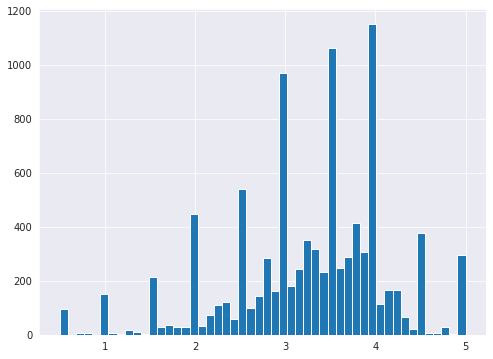

In [67]:
# Agora vamos plotar um gráfico para ver a frequência de classifcação recebida pelos filmes.
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
classificacao_media_quantidade['rating'].hist(bins=50)

In [41]:
# No gráfico acima pode se analisado que os filmes que tiveram classificação 4 foram os que tiveram maior quantidede de classificação por usuário.

In [42]:
# Bom, agora vamos tentar encontrar similaridade entre os filmes.

In [ ]:
# Vamos usar a correção entre a classificação de um filme como a métrica de similaridade.
# Para encontrar a correlação entre as classificação dos filmes, nós precisaremos criar uma matrix.
# Em que cada coluna será o nome do filme e cada linha será a classificação atribuida por um específico usuário.
# A matrix poderá ter muitos valores nulos porque nem todos os filmes foram avaliados pelos usuários.

In [68]:
# Criando a matrix
usuario_classificacao = dados_filmes.pivot_table(index='userId', columns='title', values='rating')

In [69]:
usuario_classificacao.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Cada coluna acima contêm todas as classificações dos usuários para um filme em particular.
# Vamos encontrar todas as classificações dos usuários para o filme Forrest Gump e depois encontrar um filme similar a ele.
forrest_gump_classificacao = usuario_classificacao['Forrest Gump (1994)']

In [71]:
# Vamos visualizar a classificação
forrest_gump_classificacao.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [48]:
# Pode ver que o filme só recebeu uma classificação de 4 de apenas um usuário.

In [72]:
# Agora vamos encontrar um filme similar ao Forrest Gump.
# Nós podemos encontrar a correlação entre a classificação do usuário para o filme Forrest Gump e todos outros filmes usando a função corrwith().
filmes_iguais_forrest_gump = usuario_classificacao.corrwith(forrest_gump_classificacao)

correlacao_forrest_gump = pd.DataFrame(filmes_iguais_forrest_gump, columns=['Correlation'])
correlacao_forrest_gump.dropna(inplace=True)
correlacao_forrest_gump.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [73]:
# Vamos ordernar os dados de forma decrescente para ver os filmes com maior correlação.
correlacao_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [52]:
# Lembrando que quanto mais perto de 1 maior a correlação do filme e mais perto de -1 menor a correlação do filme.

In [74]:
# Vamos ver se correlação é a mesma utilizando a classificação do filme e quantidade de classificação recebida.
correlacao_forrest_gump = correlacao_forrest_gump.join(classificacao_media_quantidade['rating_counts'])
correlacao_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [76]:
# Vamos ordernar de forma decrescente
correlacao_forrest_gump.sort_values('rating_counts', ascending=False).head(10)

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
"Shawshank Redemption, The (1994)",0.297438,317
Pulp Fiction (1994),0.077001,307
"Silence of the Lambs, The (1991)",0.221777,279
"Matrix, The (1999)",0.280199,278
Star Wars: Episode IV - A New Hope (1977),0.108355,251
Jurassic Park (1993),0.290114,238
Braveheart (1995),0.416976,237
Terminator 2: Judgment Day (1991),0.180805,224


In [ ]:
# O resultado acima mostra que utilizar a correlação pela quantidade de classificação recebida é melhor do que apenas pela classificação do filme.
# Porque os filmes que tem mais quantidades de classficações são os melhores.